# Ans2. kNN classifier and its accuracy score

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
df = pd.read_excel('Plant_Tree_data.xlsx')
df.head()

,LeafLength,LeafBreadth,ErrorLeafLength,ErrorLeafBreadth,LeafCurveAngle,EdgeCurvatureAngle,ErrorLeafCurvature,TreeLength,TreeType
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [3]:
df.shape

(17898, 9)

In [4]:
X = df.drop('TreeType', axis = 1).values
Y = df['TreeType'].values

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.3, random_state = 42, stratify = Y)

In [7]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.cluster import KMeans 
from sklearn import metrics 
from scipy.spatial.distance import cdist 

In [8]:
K = np.arange(1,10)

In [9]:
train_accuracy = np.empty(len(K))
test_accuracy = np.empty(len(K))
SSE = []
error_rate = []

In [10]:
for i,k in enumerate(K):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
    train_accuracy[i] = knn.score(X_train, Y_train)
    test_accuracy[i] = knn.score(X_test, Y_test)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != Y_test))

In [11]:
train_accuracy

array([1.        , 0.97956577, 0.97964559, 0.97693167, 0.97693167,
       0.975894  , 0.97597382, 0.97517561, 0.97469668])

In [12]:
test_accuracy

array([0.96685289, 0.97132216, 0.97430168, 0.97560521, 0.97541899,
       0.97541899, 0.97765363, 0.97728119, 0.97765363])

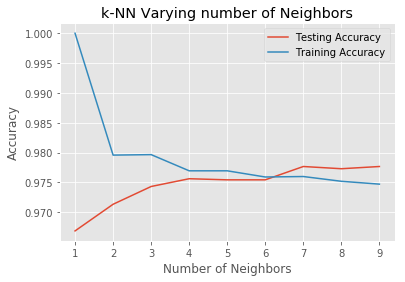

In [13]:
#Plotting graph for different values of K and test accuracy & training accuracy.
plt.title('k-NN Varying number of Neighbors')
plt.plot(K, test_accuracy, label = 'Testing Accuracy')
plt.plot(K, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [14]:
#As we can see, at k=6, both the curves meet each other. As per the accuracy curves, the model works best at k=6.
#Plotting the curve 'Error rate vs K' to see the optimal value of k from elbow curve method.

Text(0, 0.5, 'Error Rate')

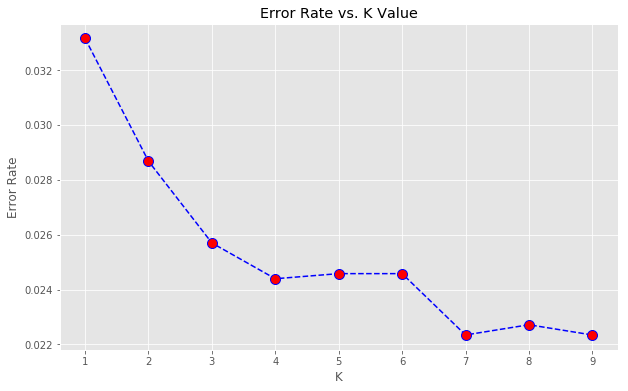

In [15]:
plt.figure(figsize=(10,6))
plt.plot(range(1,10),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

## As we can see, the elbow is formed at 4. So we can assume that the algorithm works best at k=4. 
### Calculating the accuracy of the classifier as below

In [16]:
print("Accuracy of the classifier model= ", knn.score(X_test, Y_test))

Accuracy of the classifier model=  0.9776536312849162
